## <a id="step1">Шаг 1. Импорт файлов, изучение общей информации </a>

In [1]:
# импорт всех библиотек, необходимых для работы.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [2]:
models_flights = pd.read_csv('/datasets/query_1.csv')
models_flights.info()
display(models_flights)
display(models_flights.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [3]:
sum_flights_airbus_boeing = 0
for x in models_flights.model:
    if ('Airbus' in x) or ('Boeing' in x):
        sum_flights_airbus_boeing += models_flights.loc[models_flights['model'] == x, 'flights_amount'].values
    else:
        continue
print('Количество перелетов моделями самолетов Airbus и Boeing в сентябре 2018 года составляет ', int(sum_flights_airbus_boeing))

Количество перелетов моделями самолетов Airbus и Boeing в сентябре 2018 года составляет  3097


В данной таблице представлены 8 моделей самолетов, два из которых - `Airbus`, три -`Boeing` и другие, и количество рейсов на них за сентябрь 2018 года.

Можно сразу заметить, что каждая из моделей самолетов `Bombardier CRJ-200, Cessna 208 Caravan` и `Sukhoi SuperJet-100` значительно превосходит по количеству рейсов общее количество моделей самолетов `Airbus` и `Boeing`.

In [4]:
cities_flights = pd.read_csv('/datasets/query_3.csv')
cities_flights.info()
display(cities_flights.head(10))
display(cities_flights.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


В данном датафрейме представлена информация о среднем количестве рейсов, прибывающих в различные города за день в августе 2018 года. Всего представлен 101 город. Сразу видно, что значения по средним количестве рейсов представлена неоднородно - 75% городов имеет менее 6 рейсов в день, в то время как, максимальное значение - 129,77. Скорее всего, есть какой-то лидер.

Сразу можно заметить, что в столбце `average_flights` данные не очень визуально удобны. Так как числа неольшие, будет необходимо привести данные к типу float с двумя знаками после точки.


## <a id="step2">Шаг 2. Подготовка данных </a>

Приведем среднее количество рейсов в день в `cities_flights` в более удобный вид - 

In [5]:
pd.options.display.float_format = '{:,.2f}'.format
cities_flights.info()
display(cities_flights.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
0,Абакан,3.87
1,Анадырь,1.00
2,Анапа,2.16
3,Архангельск,5.35
4,Астрахань,2.45
5,Барнаул,2.61
6,Белгород,6.00
7,Белоярский,2.00
8,Благовещенск,1.00
9,Братск,1.00


Проверим на дубликаты таблицу `cities_flights`.

In [6]:
print(cities_flights.duplicated().sum())

print(cities_flights.city.value_counts())

0
Братск          1
Воронеж         1
Мурманск        1
Улан-Удэ        1
Удачный         1
               ..
Екатеринбург    1
Оренбург        1
Геленджик       1
Когалым         1
Нефтеюганск     1
Name: city, Length: 101, dtype: int64


Пропусков не имеется, дубликатов тоже. Можно работать с данными таблицами дальше.

## <a id="step3">Шаг 3. Определение топ-10 городов вылета </a>

Для определения 10ти самых популярных городов по среднему количеству прибывающих рейсов в день, воспользуемся сортировкой в таблице `cities_flights`.

In [7]:
cities_flights = cities_flights.sort_values(by='average_flights', ascending = False).reset_index().drop('index', axis=1)
display(cities_flights.head(10))

# Создадим переменную, в которой будут храниться топ-10 городов.
top10_cities = cities_flights[:10]['city']
print(top10_cities)

,city,average_flights
0,Москва,129.77
1,Санкт-Петербург,31.16
2,Новосибирск,17.32
3,Красноярск,11.58
4,Екатеринбург,11.32
5,Ростов-на-Дону,10.19
6,Пермь,10.13
7,Брянск,10.00
8,Сочи,9.61
9,Ульяновск,9.58


0             Москва
1    Санкт-Петербург
2        Новосибирск
3         Красноярск
4       Екатеринбург
5     Ростов-на-Дону
6              Пермь
7             Брянск
8               Сочи
9          Ульяновск
Name: city, dtype: object


Уже сейчас можно заметить, что самым популярным городом является столица России - город Москва. Рассмотрим более детально остальные города в следующих шагах.

## <a id="step4">Шаг 4. Модели самолетов и количество рейсов </a>

Построим график, отображающий распределения количества рейсов в сентябре 2018 года по моделям самолета.

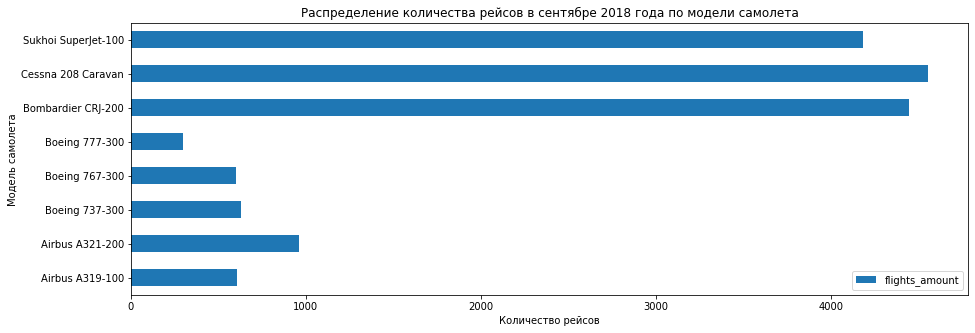

In [8]:
models_flights.plot(x='model', y='flights_amount', figsize=(15,5), kind='barh');
plt.title('Распределение количества рейсов в сентябре 2018 года по модели самолета');
plt.xlabel('Количество рейсов');
plt.ylabel('Модель самолета');

Как мы уже успели заметить, сразу же бросается в глаза огромная разница между количеством рейсов и моделями самолетов. Лидируют отнюдь не Боинг. Мы уже посчитали, что в совокупности все модели самолетов `Airbus` И `Boeing` по количеству рейсов в сентябре уступают другим моделям самолетов по отдельности. 

Есть предположение, что существует зависимость популярности трех моделей самолетов `Bombardier CRJ-200`, `Cessna 208 Caravan` и `Sukhoi SuperJet-100` и другой переменной. Скорее всего, размер самолета, а именно число посадочных мест может повлиять на запуск определенных моделей самолетов на внутренние рейсы в стране. Ведь Боинги, как правило, досточно большие. И вряд ли закупка самолетов на данные направления будет разумной идеей.

Ниже представлено количество мест для пассажиров для каждой из моделей самолетов, этих данных не хватает для анализа популярности у моделей

* `Airbus A319-100` 116 мест
* `Airbus A321-200` 170-220 мест
* `Boeing 737-300` 150 мест
* `Boeing 767-300` 218-350 мест
* `Boeing 777-300` 368-451 место

* `Bombardier CRJ-200` 50 мест
* `Cessna 208 Caravan` 13 мест
* `Sukhoi SuperJet-100` 98-108 мест

In [9]:
# Создадим словарь с количеством пассажиромест для каждой из представленных моделей самолетов
spaces = {
    'Airbus A319-100': 116, 'Airbus A321-200': 170, 'Boeing 737-300':150,
    'Boeing 767-300': 218, 'Boeing 777-300': 368, 'Bombardier CRJ-200': 50, 
    'Cessna 208 Caravan': 13, 'Sukhoi SuperJet-100': 98}

# Создадим столбец с количеством пассажиромест
models_flights['space'] = models_flights['model'].apply(lambda x: spaces[x])
display(models_flights)

,model,flights_amount,space
0,Airbus A319-100,607,116
1,Airbus A321-200,960,170
2,Boeing 737-300,630,150
3,Boeing 767-300,600,218
4,Boeing 777-300,300,368
5,Bombardier CRJ-200,4446,50
6,Cessna 208 Caravan,4557,13
7,Sukhoi SuperJet-100,4185,98


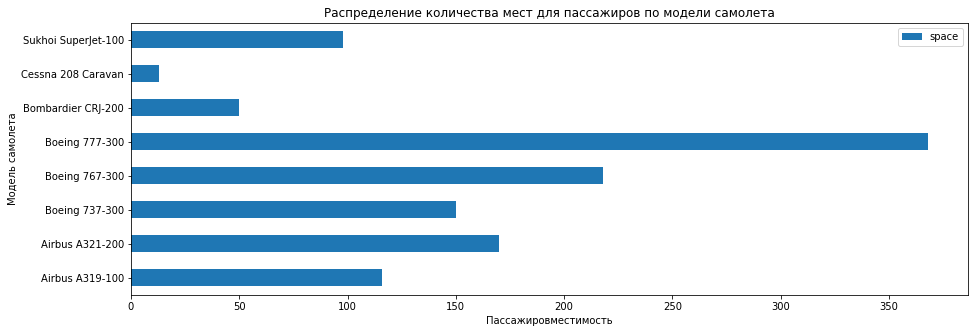

In [10]:
models_flights.plot(x='model', y='space', figsize=(15,5), kind='barh');
plt.title('Распределение количества мест для пассажиров по модели самолета');
plt.xlabel('Пассажировместимость');
plt.ylabel('Модель самолета');

Посмотрим на корреляцию количества поездок с пассажировместимостью самолетов.

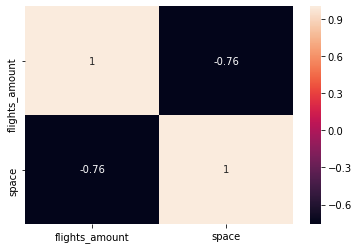

In [11]:
sns.heatmap(models_flights.corr(), annot=True)
plt.show()


Сильная отрицательная взаимосвязь количества рейсов с количеством мест в самолете. Чем больше мест, тем меньше рейсов.

Конечно, наиболее популярные модели самолетов `Bombardier CRJ-200`, `Cessna 208 Caravan` и `Sukhoi SuperJet-100` сконструированы специально для региональных перелетов, вместимость гораздо меньше, чем у `Boeing и Airbus`, что позволяет им быстрее заполнять места и увеличивать количество рейсов в день. 

## <a id="step5">Шаг 5. Города и количество рейсов, топ 10 городов </a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


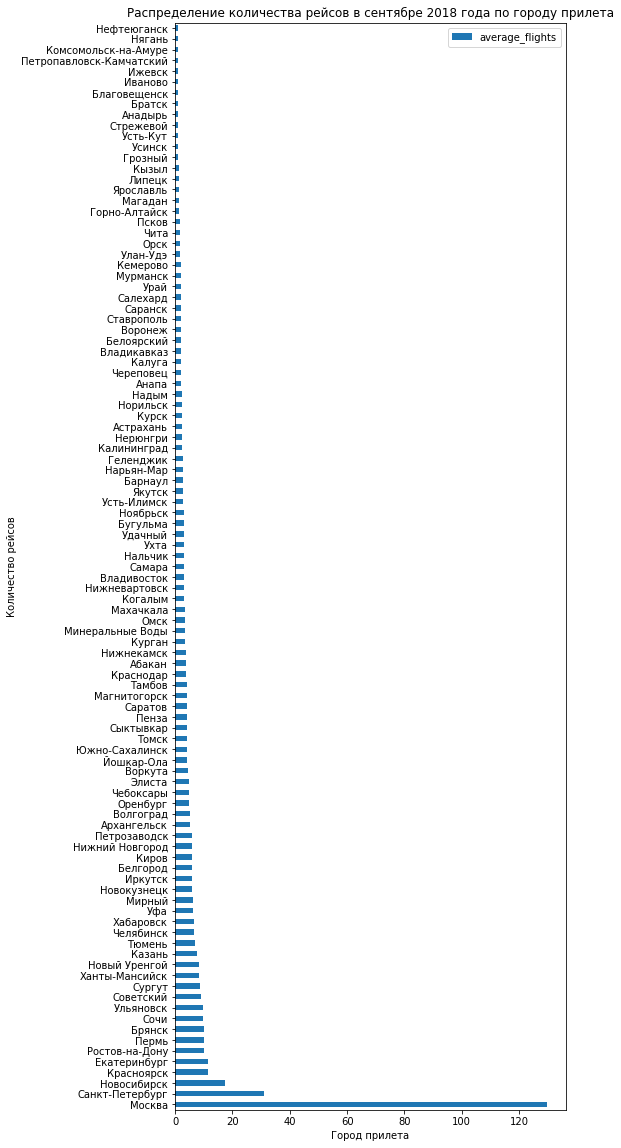

In [12]:
cities_flights.info()
cities_flights.plot(x='city', y='average_flights', figsize=(7,20), kind='barh');
plt.title('Распределение количества рейсов в сентябре 2018 года по городу прилета');
plt.ylabel('Количество рейсов');
plt.xlabel('Город прилета');

Данный график показывает нам, что большинство городов имеет до 15ти рейсов в день, за исключением первых трех городов.

Очевидно, что Москва и Санкт-Петербург - большие города, поэтому там чаще приземляются самолеты. Что касается других городов? Создадим словарь с приведенными городами и количеством населения в них, а далее - добавим соответствующий столбец в датафрейм.

In [13]:
dict_pop = {
    'Нефтеюганск': 123, 'Нягань': 59, 'Комсомольск-на-Амуре': 245,
    'Петропавловск-Камчатский': 180, 'Ижевск': 648, 'Иваново': 405,
    'Благовещенск': 226, 'Братск': 226, 'Анадырь': 16,
    'Стрежевой': 41, 'Усть-Кут': 40, 'Усинск': 38,
    'Грозный': 271, 'Кызыл': 327, 'Липецк': 508,
    'Ярославль': 608, 'Магадан': 92, 'Горно-Алтайск': 64,
    'Псков': 210, 'Чита': 351, 'Орск': 226,
    'Улан-Удэ': 39, 'Кемерово': 556, 'Мурманск': 288,
    'Урай': 41, 'Салехард': 51, 'Саранск': 320,
    'Ставрополь': 450, 'Воронеж': 1058, 'Белоярский': 19,
    'Владикавказ': 303, 'Калуга': 332, 'Череповец': 414,
    'Анапа': 89, 'Надым': 44, 'Норильск': 180,
    'Курск': 452, 'Астрахань': 529, 'Нерюнгри': 57,
    'Калининград': 489, 'Геленджик': 76, 'Нарьян-Мар': 25,
    'Барнаул': 632, 'Якутск': 322, 'Усть-Илимск': 80,
    'Ноябрьск': 106, 'Бугульма': 83, 'Удачный': 11,
    'Ухта': 95, 'Нальчик': 239, 'Самара': 1156,
    'Владивосток': 606, 'Нижневартовск': 277, 'Когалым': 67,
    'Махачкала': 603, 'Омск': 1154, 'Минеральные Воды': 73,
    'Курган': 312, 'Нижнекамск': 240, 'Абакан': 186,
    'Краснодар': 918, 'Тамбов': 291, 'Магнитогорск': 413,
    'Саратов': 841, 'Пенза': 522, 'Сыктывкар': 244,
    'Томск': 786, 'Южно-Сахалинск': 200, 'Йошкар-Ола': 271,
    'Воркута': 54, 'Элиста': 102, 
    'Чебоксары': 506, 'Оренбург': 565, 'Волгоград': 1013,
    'Архангельск': 348, 'Петрозаводск': 280, 'Нижний Новгород': 1253,
    'Киров': 512, 'Белгород': 392, 'Иркутск': 623,
    'Новокузнецк': 552, 'Мирный': 33, 'Уфа': 1124,
    'Хабаровск': 617, 'Челябинск': 1200, 'Тюмень': 788,
    'Казань': 1251, 'Новый Уренгой': 116, 'Ханты-Мансийск': 96,
    'Сургут': 376, 'Советский': 24, 'Ульяновск': 627,
    'Сочи': 438, 'Брянск': 404, 'Пермь': 1053,
    'Ростов-на-Дону': 1133, 'Екатеринбург': 1483, 'Красноярск': 1095,
    'Новосибирск': 1618, 'Санкт-Петербург': 5383, 'Москва': 12615
}

cities_flights['pop'] = cities_flights['city'].apply(lambda x: dict_pop[x])
display(cities_flights)

,city,average_flights,pop
0,Москва,129.77,12615
1,Санкт-Петербург,31.16,5383
2,Новосибирск,17.32,1618
3,Красноярск,11.58,1095
4,Екатеринбург,11.32,1483
...,...,...,...
96,Ижевск,1.00,648
97,Петропавловск-Камчатский,1.00,180
98,Комсомольск-на-Амуре,1.00,245
99,Нягань,1.00,59


       average_flights       pop
count           101.00    101.00
mean              5.49    585.33
std              13.12  1,358.48
min               1.00     11.00
25%               2.00     96.00
50%               3.00    320.00
75%               5.87    606.00
max             129.77 12,615.00


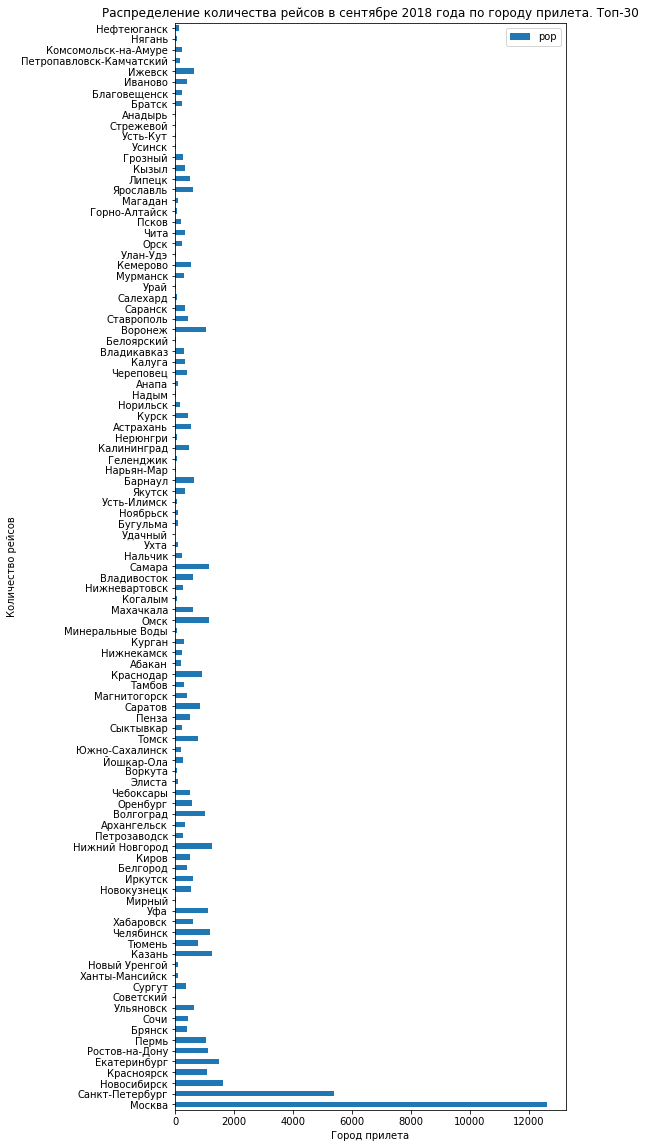

In [14]:
print(cities_flights.describe())

cities_flights.plot(x='city', y='pop', kind='barh', figsize=(7,20));
plt.title('Распределение количества рейсов в сентябре 2018 года по городу прилета. Топ-30');
plt.ylabel('Количество рейсов');
plt.xlabel('Город прилета');

В данном столбце `pop` указано численность населения в тыс. человек. Посмотрим на коэффициент корреляции.

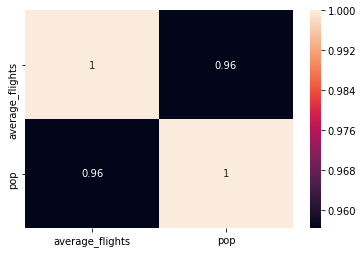

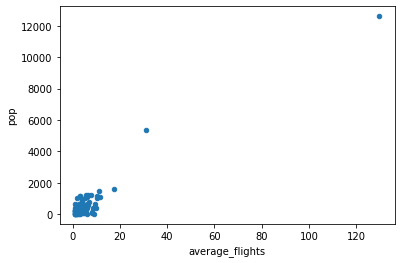

In [15]:
sns.heatmap(cities_flights.corr(), annot=True);
plt.show();

cities_flights.plot.scatter(x='average_flights', y='pop');
plt.show();



Коэффициент корреляции очень сильный и положительный, но, скорее всего, Москва перетягивает одеяло на себя. Не стоит забывать, что это столица России, туристический и бизнес центр России, с 3мя аэропортами, он образует еще и самый большой транзитный город для последующих пересадок и перелетов.

Рассмотрим коэффициент корреляции без учета Москвы.

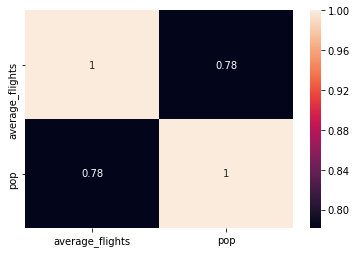

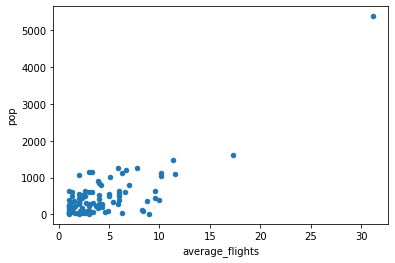

In [16]:
sns.heatmap(cities_flights.query('city != "Москва"').corr(), annot=True);
plt.show();

cities_flights.query('city != "Москва"').plot.scatter(x='average_flights', y='pop');
plt.show();

Взаимосвязь между численностью населения городов и средним количеством рейсов в городе прилета сильная и положительная. Действительно, чем выше численность населения, тем больше вероятность высокого количества рейсов в день.

В первой пятерке - крупнейшие города России, в том числе Москва - столица Российской Федерации и Санкт-Петербург - самое популярное туристическое направление в России. Следом идут в основном города-миллионники. 

В среднем (если не учитывать Москву) в города России прибывает около 3 рейсов в день.

Рассмотрим первые 10 городов по среднему количеству рейсов в день.

,city,average_flights,pop
0,Москва,129.77,12615
1,Санкт-Петербург,31.16,5383
2,Новосибирск,17.32,1618
3,Красноярск,11.58,1095
4,Екатеринбург,11.32,1483
5,Ростов-на-Дону,10.19,1133
6,Пермь,10.13,1053
7,Брянск,10.00,404
8,Сочи,9.61,438
9,Ульяновск,9.58,627


       average_flights       pop
count            10.00     10.00
mean             25.07  2,584.90
std              37.39  3,807.23
min               9.58    404.00
25%              10.03    733.50
50%              10.76  1,114.00
75%              15.89  1,584.25
max             129.77 12,615.00


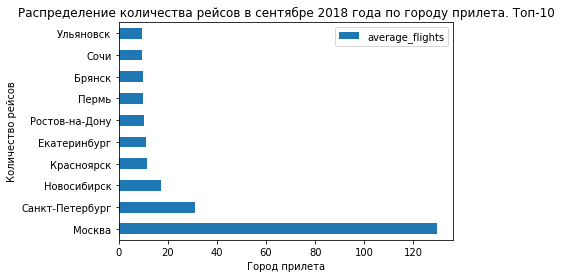

In [17]:
display(cities_flights.query('city in @top10_cities'))
print(cities_flights.query('city in @top10_cities').describe())
cities_flights.query('city in @top10_cities').plot(x='city', y='average_flights', kind='barh');
plt.title('Распределение количества рейсов в сентябре 2018 года по городу прилета. Топ-10');
plt.ylabel('Количество рейсов');
plt.xlabel('Город прилета');
plt.show();

Очень выделяются первые 3 города на графике - Москва, Санкт-Петербург и Новосибирск.

`Москва` - не зря данный город имеет аж 3 аэропорта, при этом являясь не просто столицей России, но и бизнес-центром, и популярным туристическим направлением. Сюда едут за работой, за лучшей жизнью, за фотографиями на Красной площади. ЧТо немаловажно, данный город является пересадочным пунктом для очень многих перелетов по России вследствии высокой транспортной доступности.

`Санкт-Петербург` - культурная столица России, основное туристическое направление внутри страны и за ее пределами. Очень многие россияне едут сюда осмотреть красоты, особенно в летний период.

`Новосибирск` - третий город России по численности населения, также тут развито туристическое направление, так как город с богатейшей историей. Неудивительно, что в среднем сюда прилетают 17 рейсов в день.

Далее идут в основном города с показателем в среднем 10 рейсов в день. 

При этом существуют три города в 10ке по популярности с населением менее 1 млн.

В 2016 году Брянск вошел в список городов, которые по федеральной программе получают субсидии на полеты в Крым ввиду его близкой расположенности к данной территориии. Вследствии этого уже в августе 2018 года можно увидеть, что Брянск - транзит для желающих отдохнуть в Крыму.

Сочи - самый популярярный курортный город России. Нечего добавить.

Помимо гражданской авиации ульяновский аэропорт Баратаевка используется для выполнения учебных и исследовательских полетов Ульяновского высшего авиационного училища. То есть именно сюда летят пилоты для тренировок.

## <a id="step6">Шаг 6. Выводы </a>

Итак, мы выяснили, что популярность моделей самолетов, очевидно, связано с количество пассажирских мест в них. Нерентабельно запускать огромные Боинги для перевозки небольшого количества пассажиров. Но, думаю, если бы выбор стоял за пассажиров, они бы с удовольствием пересели на более надежные `Boeing и Airbus`.

Существует несколько самых популярных направлений среди всех городов по среднему количеству рейсов в день - `Москва`, `Санкт-Петербург, Новосибирск`, они же в тройке городов по численности населения в России. Кроме того, это туристические центры. Москва - еще и город транзит. 
Существует сильная положительная взаимосвязь среднего количества рейсов в день и численности населения в городе. То есть, чем больше человек проживают в городе, тем больше вероятность того, что количество рейсов в день будет выше. Не всегда это работает, ведь есть города, которые популярны не в силу того, что это город-миллионник, есть туристические и рабочие цели (Брянск как перевалочный пункт в Крым, Сочи - самый популярный курорт в России, а Ульяновск - авиционная столица России, куда прибывает летный состав на обучение.